In [6]:
###IMPORTS 
from collections import OrderedDict
import torch
from torch import nn
import torchvision
from torchvision import transforms
import numpy as np

from gradient_inversion_API import system_startup, get_gradient, gradient_inversion, match_reconstructions

#Get Hardware
device = system_startup()

2021-06-16 09:32:15,469:[INFO][gradient_inversion_API.py][system_startup] Currently evaluating -------------------------------:
2021-06-16 09:32:15,469:[INFO][gradient_inversion_API.py][system_startup] Currently evaluating -------------------------------:
2021-06-16 09:32:15,473:[INFO][gradient_inversion_API.py][system_startup] Wednesday, 16. June 2021 09:32AM
2021-06-16 09:32:15,473:[INFO][gradient_inversion_API.py][system_startup] Wednesday, 16. June 2021 09:32AM
2021-06-16 09:32:15,475:[INFO][gradient_inversion_API.py][system_startup] CPUs: 20, GPUs: 1.
2021-06-16 09:32:15,475:[INFO][gradient_inversion_API.py][system_startup] CPUs: 20, GPUs: 1.
2021-06-16 09:32:15,481:[INFO][gradient_inversion_API.py][system_startup] GPU : GeForce RTX 2080 Ti
2021-06-16 09:32:15,481:[INFO][gradient_inversion_API.py][system_startup] GPU : GeForce RTX 2080 Ti


In [7]:
#GET DATALOADER 
def build_cifar10(batch_size = 64, datapath='./data/', train_transformations = transforms.ToTensor(), val_transformations = transforms.ToTensor()):
    trn_set = torchvision.datasets.CIFAR10(root=datapath, train=True, download=True, transform=train_transformations)
    tst_set = torchvision.datasets.CIFAR10(root=datapath, train=False, download=True, transform=val_transformations)
    trn_loader = torch.utils.data.DataLoader(trn_set, batch_size=batch_size, shuffle=True, drop_last=True)
    tst_loader = torch.utils.data.DataLoader(tst_set, batch_size=batch_size, shuffle=False, drop_last=False)
    return trn_loader, tst_loader

#Prep dataset
trn_loader, tst_loader = build_cifar10(batch_size=8)
for i, l in trn_loader:
    images = i
    labels = l
    break
images = images.to(device)
labels = labels.to(device)
batch_size = images.shape[0]
data_shape = (3,32,32)
num_classes = 10

#GET datset statistics
cifar10_mean = [0.4914672374725342, 0.4822617471218109, 0.4467701315879822]
cifar10_std = [0.24703224003314972, 0.24348513782024384, 0.26158785820007324]
dm = torch.as_tensor(cifar10_mean)[:, None, None]
ds = torch.as_tensor(cifar10_std)[:, None, None]

Files already downloaded and verified
Files already downloaded and verified


In [8]:
#Get model and Loss function
loss_fn = torch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean') # same loss function you would train your model with
model = nn.Sequential(OrderedDict([
            ('flatten', nn.Flatten()),
            ('linear0', nn.Linear(np.prod(data_shape), 1024)),
            ('relu0', nn.ReLU()),
            ('linear1', nn.Linear(1024, 1024)),
            ('relu1', nn.ReLU()),
            ('linear2', nn.Linear(1024, num_classes))]))

gradient = get_gradient(model=model, input_data=images, gt_labels=labels, loss_fn=loss_fn, train_mode=True)
output, best_loss = gradient_inversion(gradient=gradient, labels=labels, model=model, data_shape=data_shape, dm=dm, ds=ds)

Generatig gradient from victim data...
Performing a Gradientinversion attack.
2021-06-16 09:32:18,189:[INFO][reconstruction_algorithms.py][_run_trial] It: 0. Rec. loss: 0.8695.
2021-06-16 09:32:18,189:[INFO][reconstruction_algorithms.py][_run_trial] It: 0. Rec. loss: 0.8695.
2021-06-16 09:32:27,724:[INFO][reconstruction_algorithms.py][_run_trial] It: 500. Rec. loss: 0.0447.
2021-06-16 09:32:27,724:[INFO][reconstruction_algorithms.py][_run_trial] It: 500. Rec. loss: 0.0447.
2021-06-16 09:32:36,031:[INFO][reconstruction_algorithms.py][_run_trial] It: 1000. Rec. loss: 0.0433.
2021-06-16 09:32:36,031:[INFO][reconstruction_algorithms.py][_run_trial] It: 1000. Rec. loss: 0.0433.
2021-06-16 09:32:42,078:[INFO][reconstruction_algorithms.py][_run_trial] It: 1500. Rec. loss: 0.0475.
2021-06-16 09:32:42,078:[INFO][reconstruction_algorithms.py][_run_trial] It: 1500. Rec. loss: 0.0475.
2021-06-16 09:32:51,634:[INFO][reconstruction_algorithms.py][_run_trial] It: 2000. Rec. loss: 0.0433.
2021-06-16 0

In [9]:
#Match reconstructions to originals
images = images.detach().clone().cpu()
output = output.detach().clone().cpu()
output = match_reconstructions(images, output)

Original


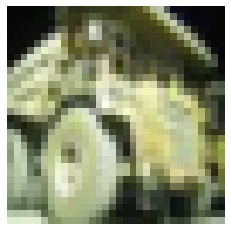

Reconstruction
2021-06-16 09:32:55,523:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2021-06-16 09:32:55,523:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


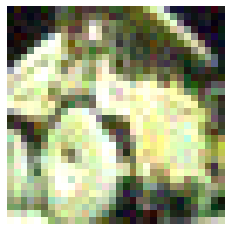

Original


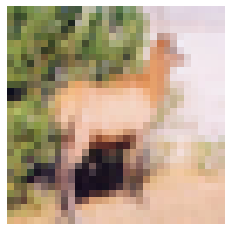

Reconstruction
2021-06-16 09:32:55,749:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2021-06-16 09:32:55,749:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


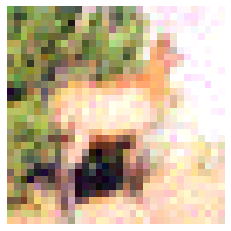

Original


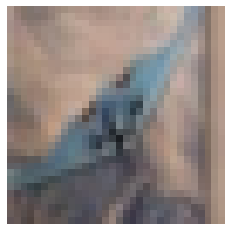

Reconstruction
2021-06-16 09:32:55,891:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2021-06-16 09:32:55,891:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


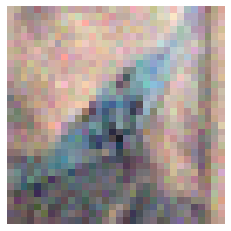

Original


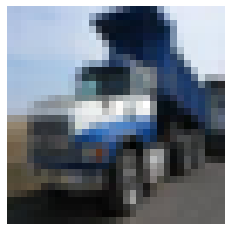

Reconstruction
2021-06-16 09:32:56,028:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2021-06-16 09:32:56,028:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


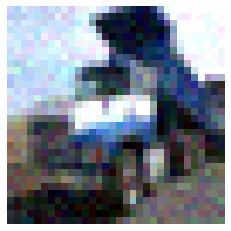

Original


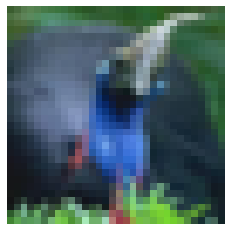

Reconstruction
2021-06-16 09:32:56,170:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2021-06-16 09:32:56,170:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


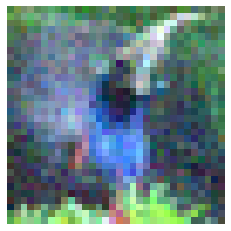

Original


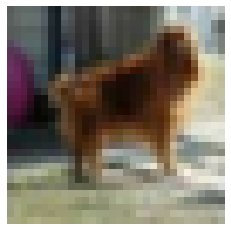

Reconstruction
2021-06-16 09:32:56,343:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2021-06-16 09:32:56,343:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


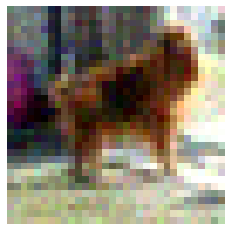

Original


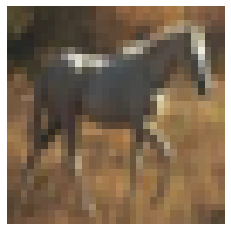

Reconstruction
2021-06-16 09:32:56,487:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2021-06-16 09:32:56,487:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


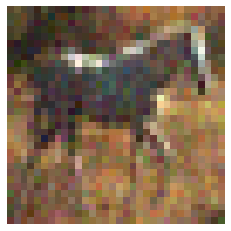

Original


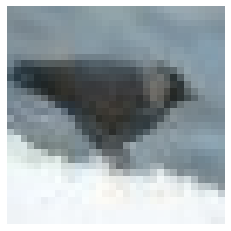

Reconstruction
2021-06-16 09:32:56,699:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2021-06-16 09:32:56,699:[WARNING][image.py][set_data] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


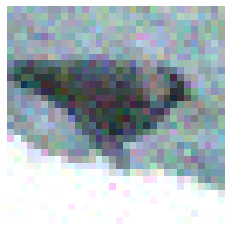

In [10]:
import matplotlib.pyplot as plt
def show_single_img(img):
    plt.imshow(img.permute(1, 2, 0).cpu());
    plt.axis('off')
    plt.show()
    plt.close()

for i, r in zip(images, output):
    print('Original')
    show_single_img(i)
    print('Reconstruction')
    show_single_img(r)